## Thêm thư viện cần thiết

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from pathlib import Path
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

## Load dữ liệu vào Dataframe

In [2]:
raw_data_path = os.path.join(Path(os.getcwd()).parent, 'data', 'raw data', 'top_tracks_by_artist.csv')
tracks_df = pd.read_csv(raw_data_path, encoding = 'utf-8')
tracks_df

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,0eAWyR4wHynLdc9A0VTVQP,Lửng Lơ - Remix,IOF Viet Nam,100,[],Lửng Lơ (Remix),2022-07-07,1,258194,False,25
1,5iN9Ok2bsAE2lCBVEx9L1U,Cheri Cheri Lady - Remix,IOF Viet Nam,100,[],Cheri Cheri Lady (Remix),2022-07-07,1,193073,False,24
2,0NIjRHPH7vq56ZaEgfk1DD,Ngày Chưa Giông Bão - Remix,IOF Viet Nam,100,[],Ngày Chưa Giông Bão (Remix),2022-06-29,1,202659,False,15
3,5yANdLi61sbT2gBK1jIGVV,Tay Trái Chỉ Trăng - Remix,IOF Viet Nam,100,[],Tay Trái Chỉ Trăng (Remix),2022-06-28,1,243880,False,12
4,2OCkw2aRFHZJ3k9zy07g5x,Xa Vắng - Remix,IOF Viet Nam,100,[],Xa Vắng (Remix),2022-07-24,1,142106,False,12
...,...,...,...,...,...,...,...,...,...,...,...
1522,33ISD5e3fEp72qV35w1wE8,Hang Nghin Kilomet,hooligan.,31146,['v-pop'],Hang Nghin Kilomet,2020-06-04,1,223644,False,34
1523,3RHjF3f04LeCgZwZJp50zI,Bai Hat Cho Darling,hooligan.,31146,['v-pop'],Bai Hat Cho Darling,2020-12-17,1,202552,False,22
1524,4YFEQfiGTDoyRNuJs2wrED,Love You Bae!,hooligan.,31146,['v-pop'],Love You Bae!,2021-04-14,1,203663,False,21
1525,5CFtSlO2CSCEEVRj8I1rtx,Future Of Us,hooligan.,31146,['v-pop'],Bài Hát Hay Nhất - Big Song Big Deal (Tập 10),2022-12-04,5,193602,False,17


## Tổng quan về dữ liệu

Số dòng và số cột của tập dữ liệu

In [3]:
num_rows, num_cols = tracks_df.shape
print('Số dòng: {}\nSố cột: {}'.format(num_rows, num_cols))

Số dòng: 1527
Số cột: 11


Kiểu dữ liệu từng cột

In [4]:
tracks_df.dtypes

id                    object
name                  object
artist                object
artist_followers       int64
artist_genres         object
album                 object
release_date          object
album_total_tracks     int64
duration               int64
explicit                bool
popularity             int64
dtype: object

Ý nghĩa của từng cột

| Tên cột | Ý nghĩa |
| --- | --- |
| **id** | ID của bài hát trên Spotify |
| **name** | Tên bài hát |
| **artist** | Tên nghệ sĩ trình bày |
| **artist_followers** | Số followers của nghệ sĩ trên Spotify |
| **artist_genres** | Thể loại chủ đạo của nghệ sĩ |
| **album** | Tên album mà bài hát thuộc về |
| **release_date** | Ngày album phát hành |
| **album_total_tracks** | Tổng số bài hát có trong album |
| **duration** | Độ dài bài hát (ms) |
| **explicit** | Lời nhạc có yếu tố không phù hợp với trẻ em không |
| **popularity** | Độ nổi tiếng của bài hát từ thang điểm 0-100 |

**Có bài hát nào bị trùng id không ?**

In [5]:
tracks_duplicate_count = tracks_df.duplicated(subset = 'id').sum()
tracks_duplicate_count

84

Có 84 bài hát bị trùng id. Điều này là do một bài hát có thể được trình bày bởi nhiều nghệ sĩ khác nhau, dẫn đến việc một bài hát có thể thuộc top tracks của nhiều nghệ sĩ.

In [6]:
def missing_ratio(s):
  '''
  Calculating the ratio of missing values in a column
  input: the column s
  output: the ratio of missing value of the s column
  '''
  return s.isna().mean()*100

**Tỉ lệ giá trị thiếu của từng cột**

In [7]:
tracks_df.agg(missing_ratio).to_frame(name = 'missing_ratio')

,missing_ratio
id,0.0
name,0.0
artist,0.0
artist_followers,0.0
artist_genres,0.0
album,0.0
release_date,0.0
album_total_tracks,0.0
duration,0.0
explicit,0.0


Dường như không có cột nào bị thiếu dữ liệu

## Chuyển đổi về kiểu dữ liệu phù hợp cho một số cột

### Chuyển đổi kiểu dữ liệu của release_date từ object sang datetime

Dữ liệu ở cột release_date có hai dạng format là: Y-m-d hoặc Y. Ta sẽ xử lý cả hai trường hợp

In [8]:
datatime_col = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d', errors="coerce") \
                .fillna( \
                pd.to_datetime(tracks_df['release_date'], format='%Y', errors="coerce"))

Những giá trị không thể chuyển đổi sang dạng datetime theo format cho trước sẽ trả về giá trị NaT (Not a Time), tương tự như giá trị NaN

In [9]:
tracks_df[datatime_col.isna()]

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
1127,7BSyMiUKDSXdnZ9wTmLPKv,Năm Ấy,Đức Phúc,855538,['v-pop'],Năm Ấy,0000,1,260351,False,47


Ở dòng 1127, cột release_date có giá trị không hợp lệ là 0000, dẫn đến việc bị trả về NaT. Ta sẽ tiến hành loại bỏ dòng này

In [10]:
tracks_df = tracks_df.drop(1127).reset_index(drop = True)
tracks_df.loc[1127]

id                    2PZENjHdoBW7u1qLB1Twra
name                          Yêu Được Không
artist                              Đức Phúc
artist_followers                      855538
artist_genres                      ['v-pop']
album                         Yêu Được Không
release_date                            2019
album_total_tracks                         1
duration                              331755
explicit                               False
popularity                                44
Name: 1127, dtype: object

Gán giá trị đã được chuyển đổi kiểu dữ liệu lên cột release_date

In [11]:
test = datatime_col.dropna()
test.loc[1125:1130]

1125   2022-09-24
1126   2016-01-01
1128   2019-01-01
1129   2022-05-27
1130   2022-05-05
Name: release_date, dtype: datetime64[ns]

In [12]:
tracks_df.loc[:, 'release_date'] = datatime_col.dropna().reset_index()
tracks_df.dtypes

id                            object
name                          object
artist                        object
artist_followers               int64
artist_genres                 object
album                         object
release_date          datetime64[ns]
album_total_tracks             int64
duration                       int64
explicit                        bool
popularity                     int64
dtype: object

### Chuyển đổi đơn vị độ dài bài hát từ milisecond sang second

In [13]:
tracks_df.loc[:, 'duration'] = tracks_df['duration'].apply(lambda x : x//1000)
tracks_df.head(5)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,0eAWyR4wHynLdc9A0VTVQP,Lửng Lơ - Remix,IOF Viet Nam,100,[],Lửng Lơ (Remix),2022-07-07,1,258,False,25
1,5iN9Ok2bsAE2lCBVEx9L1U,Cheri Cheri Lady - Remix,IOF Viet Nam,100,[],Cheri Cheri Lady (Remix),2022-07-07,1,193,False,24
2,0NIjRHPH7vq56ZaEgfk1DD,Ngày Chưa Giông Bão - Remix,IOF Viet Nam,100,[],Ngày Chưa Giông Bão (Remix),2022-06-29,1,202,False,15
3,5yANdLi61sbT2gBK1jIGVV,Tay Trái Chỉ Trăng - Remix,IOF Viet Nam,100,[],Tay Trái Chỉ Trăng (Remix),2022-06-28,1,243,False,12
4,2OCkw2aRFHZJ3k9zy07g5x,Xa Vắng - Remix,IOF Viet Nam,100,[],Xa Vắng (Remix),2022-07-24,1,142,False,12


## Khám phá sâu hơn về dữ liệu

**Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất**

Text(0.5, 1.0, 'Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

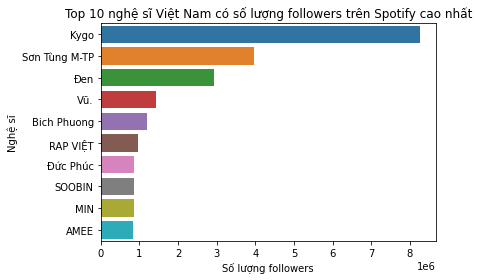

In [14]:
sorted_df = tracks_df.sort_values(by = 'artist_followers', ascending = False)
sorted_df = sorted_df.drop_duplicates(subset = 'artist')[['artist', 'artist_followers']]
ax = sns.barplot(sorted_df.head(10), x = 'artist_followers', y = 'artist')
ax.set_xlabel('Số lượng followers')
ax.set_ylabel('Nghệ sĩ')
ax.set_title('Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

Ở đây xuất hiện một lỗi nhỏ khi mà Kygo - 1 DJ nổi tiếng người Nauy, lại nằm trong danh sách chỉ gồm các nghệ sĩ Việt Nam.

Ta sẽ tiến hành lọc đi các bài hát thuộc về Céline Dion khỏi tập dữ liệu.

Text(0.5, 1.0, 'Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

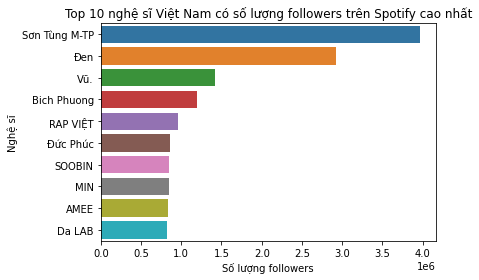

In [15]:
tracks_df = tracks_df[tracks_df['artist'] != 'Kygo']
sorted_df = tracks_df.sort_values(by = 'artist_followers', ascending = False)
sorted_df = sorted_df.drop_duplicates(subset = 'artist')[['artist', 'artist_followers']]
ax = sns.barplot(sorted_df.head(10), x = 'artist_followers', y = 'artist')
ax.set_xlabel('Số lượng followers')
ax.set_ylabel('Nghệ sĩ')
ax.set_title('Top 10 nghệ sĩ Việt Nam có số lượng followers trên Spotify cao nhất')

**Top các bài hát có độ dài lớn nhất**

In [16]:
tracks_df.sort_values(by = 'duration', ascending = False).head(10)[['id', 'name', 'duration']].reset_index(drop = True)

,id,name,duration
0,24Xc0WonMsVrvp6UpDczkV,Bi Trường Kịch Lá Sầu Riêng,5171
1,1fIHuxhPOEMeJg4L668YkI,04 - Ngoai troi giong bao (Minh Canh-Minh Chi-...,754
2,1TPQApxiS5nzKdleTnU1L1,Trích Đoạn Máu Nhuộm Sân Chùa,698
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,557
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,556
5,2ePBZnZ9I824PlUdRYxWzA,Rapcoustic 5,547
6,2ePBZnZ9I824PlUdRYxWzA,Rapcoustic 5,547
7,0eRW4f7LcCabJp4fX0fQC9,Tân Cổ Chim Trắng Mồ Côi,538
8,1hUBB3bgU0p0FWmU2T7EUg,Sống Cho Hết Đời Thanh Xuân 2,532
9,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,529


Bài hát có độ dài lớn nhất lên đến 5171 giây, tương đương với khoảng 86 phút, lớn hơn rất nhiều lần so với bài hát đứng thứ hai là 754 giây. Ta xem đây là một outlier và tiến hành loại bỏ bài hát trên để thuận tiện cho việc trực quan sau này.

In [17]:
tracks_df = tracks_df[tracks_df['duration'] != 5171]

### Bảng thống kê dữ liệu cơ bản của các cột numeric

In [18]:
numeric_df = tracks_df.select_dtypes(include = 'number')
numeric_df.describe().round(2)

,artist_followers,album_total_tracks,duration,popularity
count,1515.00,1515.00,1515.00,1515.00
mean,218229.63,3.79,237.91,33.93
std,462640.11,5.70,62.18,16.24
min,0.00,1.00,13.00,0.00
25%,3295.00,1.00,202.00,24.00
50%,51515.00,1.00,231.00,36.00
75%,248236.00,5.00,268.00,46.00
max,3963681.00,103.00,754.00,72.00


Boxplot thể hiện sự phân bố của dữ liệu ở các cột numeric

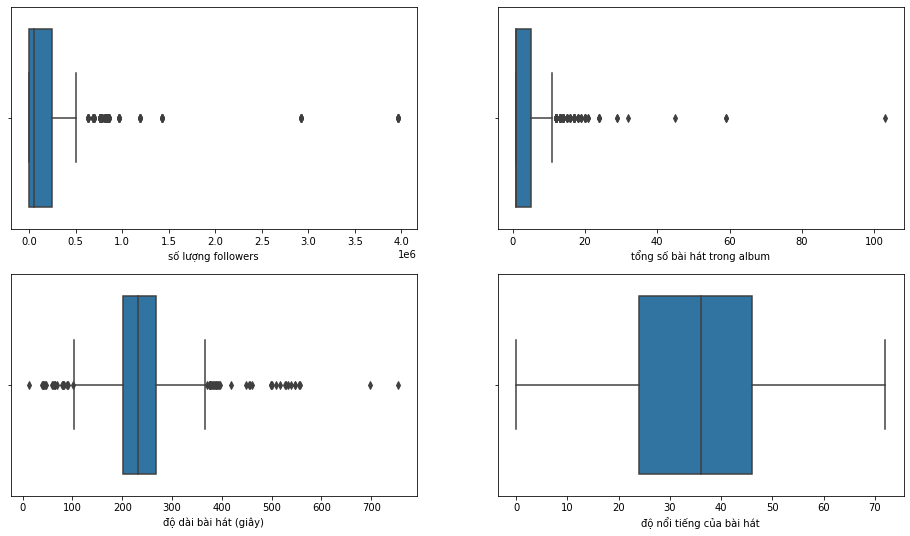

In [19]:

subplot_label = {
  'artist_followers' : 'số lượng followers',
  'album_total_tracks' : 'tổng số bài hát trong album',
  'duration' : 'độ dài bài hát (giây)',
  'popularity' : 'độ nổi tiếng của bài hát'
  }
fig,axes = plt.subplots(2,2,figsize = (16,9))
for ax, key in zip(axes.flat, list(subplot_label.keys())):
  sns.boxplot(numeric_df, x = key, ax = ax)
  ax.set_xlabel(subplot_label[key])

### Bảng thống kê dữ liệu cơ bản cho các cột categorical

In [20]:
cate_df = tracks_df.select_dtypes(include = 'object').drop(columns = 'id')
cate_df.describe()

,name,artist,artist_genres,album
count,1515,1515,1515,1515
unique,1391,173,35,1172
top,có hẹn với thanh xuân,ERIK,['v-pop'],Ca nguyện Tri ân (40 Năm Hồng Ân)
freq,4,10,434,10


## Lưu lại dữ liệu đã qua xử lý 

In [21]:
cleaned_data_path = os.path.join(Path(os.getcwd()).parent, 'data', 'cleaned data', 'top_tracks_by_artist_cleaned.csv')
tracks_df.to_csv(cleaned_data_path, encoding = 'utf-8', index = False)